# HW5 Skeleton Code
Please note that this skeleton code is provided to help you with homework.
Full description of each question can be found on HW5.pdf, so please read instruction of each question carefully. There might be some questions that is not presented in this code.

In [1]:
import os
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## Q. Changing HTML Text to Plain Text

The Python library <b>BeautifulSoup</b> is useful for dealing with html text. In order to use this library, you will need to install it first by running the following command: 
 <b>conda install beautifulsoup4</b> 
 in the terminal.
 <br> In the code, you can import it by running the following line: 
<br> 
  <b>from bs4 import BeautifulSoup </b>
<br>

In [2]:
  #Read our data file
df_train = pd.read_csv(r'stack_stats_2023_train.csv') #Todo
df_test = pd.read_csv(r'stack_stats_2023_test.csv') #Todo
#df_train['Title']

In [3]:
#Cleaning 'Body'
#Change HTML Text to Plain text using get_text() function from BeautifulSoup
#If you are not familiar with the apply method, please check discussion week 10 lecture and code.

#Manually cleaned up newline tag \n and tab tag \t.
df_train['Body'] = df_train['Body'].apply(lambda x: BeautifulSoup(x).get_text().replace('/n', '').replace('/t', '')) #Todo

#Cleaning Tags
#This would be somewhat similar to the above.
#Manually cleaned up newline tag \n and tab tag \t.
df_train['Tags'] = df_train['Tags'].apply(lambda x: BeautifulSoup(x).get_text().replace('/n', '').replace('/t', ''))


#Todo: Repeat the same process for test dataset 
df_test['Body'] = df_test['Body'].apply(lambda x: BeautifulSoup(x).get_text().replace('/n', '').replace('/t', ''))
df_test['Tags'] = df_test['Tags'].apply(lambda x: BeautifulSoup(x).get_text().replace('/n', '').replace('/t', ''))


#df_train['Title']

## Q. Basic Text Cleaning and Merging into a single Text data

### Change to Lower Case, Remove puncuation, digits, 

In [4]:
#Change to Lowercase

df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].applymap(lambda x: x.lower()) #Todo, do you see why we used applymap instead of apply in this case? 
df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].applymap(lambda x: x.lower()) #Todo

#df_train['Title']

In [5]:
#Remove Punctations 
from string import punctuation

#You can get this function from our discussion session code. However, we leave it as a blank for a practice.
def remove_punctuation(document):
    
    no_punct = ''.join([character for character in document if character not in punctuation])#Todo

    return no_punct

df_train['Body'] = df_train['Body'].apply(remove_punctuation)
df_train['Title'] = df_train['Title'].apply(remove_punctuation)
df_train['Tags'] = df_train['Tags'].apply(remove_punctuation)
df_test['Body'] = df_test['Body'].apply(remove_punctuation)
df_test['Title'] = df_test['Title'].apply(remove_punctuation)
df_test['Tags'] = df_test['Tags'].apply(remove_punctuation)
# df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].apply(remove_punctuation)#Todo 
# df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].apply(remove_punctuation)#Todo

# df_train['Title']

In [6]:
#Remove Digits 

def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])#Todo
              
    return no_digit

df_train['Body'] = df_train['Body'].apply(remove_digit)
df_train['Title'] = df_train['Title'].apply(remove_digit)
df_train['Tags'] = df_train['Tags'].apply(remove_digit)
df_test['Body'] = df_test['Body'].apply(remove_digit)
df_test['Title'] = df_test['Title'].apply(remove_digit)
df_test['Tags'] = df_test['Tags'].apply(remove_digit)

# df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].apply(remove_digit)#Todo 
# df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].apply(remove_digit)#Todo

# df_train['Title']

### Tokenization and Remove Stopwords and do stemming

In [7]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df_train['Body'] = df_train['Body'].apply(word_tokenize)
df_train['Title'] = df_train['Title'].apply(word_tokenize)
df_train['Tags'] = df_train['Tags'].apply(word_tokenize)
df_test['Body'] = df_test['Body'].apply(word_tokenize)
df_test['Title'] = df_test['Title'].apply(word_tokenize)
df_test['Tags'] = df_test['Tags'].apply(word_tokenize)
# df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].apply(word_tokenize)#Todo 
# df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].apply(word_tokenize)#Todo

# df_train['Title']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#Remove Stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]#Todo
    
    return words

df_train['Body'] = df_train['Body'].apply(remove_stopwords)
df_train['Title'] = df_train['Title'].apply(remove_stopwords)
df_train['Tags'] = df_train['Tags'].apply(remove_stopwords)
df_test['Body'] = df_test['Body'].apply(remove_stopwords)
df_test['Title'] = df_test['Title'].apply(remove_stopwords)
df_test['Tags'] = df_test['Tags'].apply(remove_stopwords)
# df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].apply(remove_stopwords)#Todo
# df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].apply(remove_stopwords)#Todo

# df_train['Title']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#We use porter stemming 

from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document] #Todo
    
    return stemmed_document

df_train['Body'] = df_train['Body'].apply(stemmer)
df_train['Title'] = df_train['Title'].apply(stemmer)
df_train['Tags'] = df_train['Tags'].apply(stemmer)
df_test['Body'] = df_test['Body'].apply(stemmer)
df_test['Title'] = df_test['Title'].apply(stemmer)
df_test['Tags'] = df_test['Tags'].apply(stemmer)
# df_train[['Body','Title','Tags']] = df_train[['Body','Title','Tags']].apply(stemmer) #Todo
# df_test[['Body','Title','Tags']] = df_test[['Body','Title','Tags']].apply(stemmer) #Todo

## Let's Check our dataframe

In [10]:
df_train.head(5)

,Id,Score,Body,Title,Tags
0,502641,1,"[im, master, student, eec, work, way, toward, ...","[pytorch, tutori, dqn, defin, state, differ]",[]
1,477291,1,"[know, good, question, found, answer, anywher,...","[random, walk, memori]",[]
2,448489,4,"[time, repeat, fold, crossvalid, want, report,...","[statist, report, repeat, crossvalid]",[]
3,487075,0,"[dataset, mm, record, around, featur, class, i...","[binari, classif, imbalanc, data, odd, calibr,...",[]
4,481670,2,"[want, run, regress, one, explanatori, variabl...","[best, summar, likert, data, use, independ, va...",[]


### Q. Treat Three text data independently and merge into one column

In [11]:
#Treat Three types of data independently
#let's define functions that will help this operation
def add_body(document):
    
    string = '_body'
    added_document = [x + string for x in document]
  
    return added_document

def add_title(document):
    
    string = '_title'
    added_document = [x + string for x in document]
  
    return added_document

def add_tags(document):
    
    string = '_tags'
    added_document = [x + string for x in document]
  
    return added_document

In [12]:
df_train['Body'] = df_train['Body'].apply(lambda x: add_body(x))
df_train['Title'] = df_train['Title'].apply(lambda x: add_title(x))
df_train['Tags'] = df_train['Tags'].apply(lambda x: add_tags(x))

df_test['Body'] = df_test['Body'].apply(lambda x: add_body(x))
df_test['Title'] = df_test['Title'].apply(lambda x: add_title(x))
df_test['Tags'] = df_test['Tags'].apply(lambda x: add_tags(x))

In [13]:
#Now we need to merge all those 3 columns into a single column. Implement this below.
df_train['text'] = df_train['Body'] + df_train['Title'] + df_train['Tags']#Todo
df_test['text'] = df_test['Body'] + df_test['Title'] + df_test['Tags']#Todo

# print(df_test['text'])
# len(df_test['text'].axes[1])

## Let's check our DataFrame

In [14]:
df_train.head(5)

,Id,Score,Body,Title,Tags,text
0,502641,1,"[im_body, master_body, student_body, eec_body,...","[pytorch_title, tutori_title, dqn_title, defin...",[],"[im_body, master_body, student_body, eec_body,..."
1,477291,1,"[know_body, good_body, question_body, found_bo...","[random_title, walk_title, memori_title]",[],"[know_body, good_body, question_body, found_bo..."
2,448489,4,"[time_body, repeat_body, fold_body, crossvalid...","[statist_title, report_title, repeat_title, cr...",[],"[time_body, repeat_body, fold_body, crossvalid..."
3,487075,0,"[dataset_body, mm_body, record_body, around_bo...","[binari_title, classif_title, imbalanc_title, ...",[],"[dataset_body, mm_body, record_body, around_bo..."
4,481670,2,"[want_body, run_body, regress_body, one_body, ...","[best_title, summar_title, likert_title, data_...",[],"[want_body, run_body, regress_body, one_body, ..."


### Q. Detokenize and convert to document term matrices

In [15]:
#Merge Three text column into one column and detokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer

text_train = df_train['text'].apply(TreebankWordDetokenizer().detokenize) #Todo: Detokenize your tokenized text data
countvec_train = CountVectorizer(min_df=0.005)
countvec = CountVectorizer(min_df=0.005) #Todo: Define your own CountVectorizer here
sparse_dtm_train = countvec_train.fit_transform(text_train) #Todo: Fit and Transform your Countvectorizer and return sparse dtm.

In [16]:
#Todo: Do same on the test set.
text_test = df_test['text'].apply(TreebankWordDetokenizer().detokenize)
sparse_dtm_test = countvec.fit_transform(text_test)

In [17]:
#Convert the sprase dtm to pandas DataFrame.
dtm_train = pd.DataFrame(sparse_dtm_train.toarray(), columns=countvec_train.get_feature_names(), index=text_train.index)
dtm_test = pd.DataFrame(sparse_dtm_test.toarray(), columns=countvec.get_feature_names(), index=text_test.index)

In [18]:
#Combine the train_DTM and test_DTM together, using inner join to exclude features that only appear in one DTM.
dtm = pd.concat([dtm_train, dtm_test], join = 'inner')

In [19]:
#Separate the new train_DTM and test_DTM from the combined DTM.
new_dtm_train = dtm.iloc[0:dtm_train.shape[0]]
new_dtm_test = dtm.iloc[dtm_train.shape[0]:]

### Q. Change dependent variable to binary variable

In [20]:
#Change 'Score' to a binary variable, which indicates whether the question is good or not.
y_train = np.where(df_train['Score'] > 1, 1, 0) #Todo
y_test = np.where(df_test['Score'] > 1, 1, 0) #Todo

In [21]:
#Add y_train and y_test to your data frame if it is needed. Drop unnecessary columns
df_train['good_question'] = y_train
df_test['good_question'] = y_test

In [22]:
df_train.drop(columns=['good_question'], inplace=True)
df_test.drop(columns=['good_question'], inplace=True)

## Let's check our DataFrame


In [23]:
df_train.head(5)

,Id,Score,Body,Title,Tags,text
0,502641,1,"[im_body, master_body, student_body, eec_body,...","[pytorch_title, tutori_title, dqn_title, defin...",[],"[im_body, master_body, student_body, eec_body,..."
1,477291,1,"[know_body, good_body, question_body, found_bo...","[random_title, walk_title, memori_title]",[],"[know_body, good_body, question_body, found_bo..."
2,448489,4,"[time_body, repeat_body, fold_body, crossvalid...","[statist_title, report_title, repeat_title, cr...",[],"[time_body, repeat_body, fold_body, crossvalid..."
3,487075,0,"[dataset_body, mm_body, record_body, around_bo...","[binari_title, classif_title, imbalanc_title, ...",[],"[dataset_body, mm_body, record_body, around_bo..."
4,481670,2,"[want_body, run_body, regress_body, one_body, ...","[best_title, summar_title, likert_title, data_...",[],"[want_body, run_body, regress_body, one_body, ..."


## (b) Please read the instruction carefully in the pdf.

In [31]:
x_train = new_dtm_train
x_test = new_dtm_test
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
# y_train = df_train['good_question'].astype('int32')
# x_train = dtm_train

# y_test = df_train['good_question'].astype('int32')
# x_test = dtm_test

# len(x_test.axes[1])
x_test.info


<bound method DataFrame.info of       _body  ab_body  abil_body  abl_body  absolut_body  accept_body  \
0         0        0          0         0             0            0   
1         0        0          0         0             2            0   
2         0        0          0         1             0            0   
3         0        0          0         1             0            0   
4         0        0          0         0             0            0   
...     ...      ...        ...       ...           ...          ...   
8244      0        0          0         0             0            0   
8245      0        0          0         0             0            0   
8246      0        0          0         0             0            0   
8247      0        0          0         0             0            0   
8248      0        0          0         0             1            0   

      access_body  accord_body  account_body  accur_body  ...  ye_body  \
0               0            

## CART Model

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(x_train, y_train)

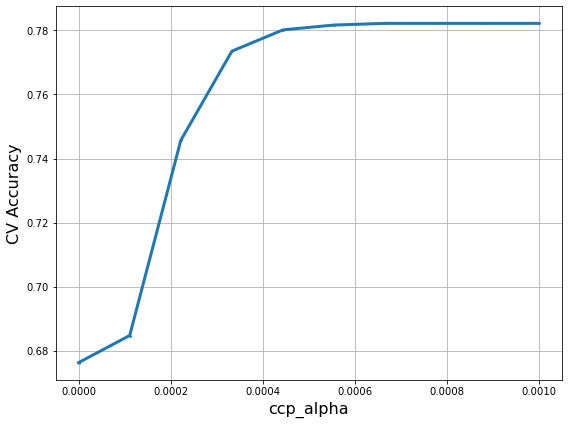

Best ccp_alpha {'ccp_alpha': 0.0006666666666666668}


In [26]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 9


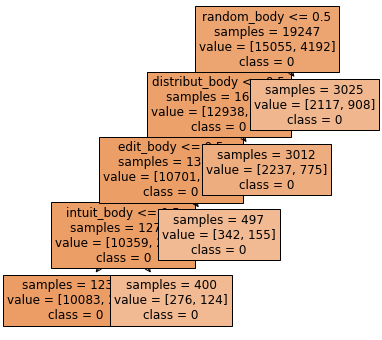

In [27]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=x_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = dtc_cv.predict(x_test)
dtc_cm = confusion_matrix(y_test, y_pred)
dtc_acc = accuracy_score(y_test, y_pred)
dtc_TPR = (dtc_cm.ravel()[3])/(dtc_cm.ravel()[2]+dtc_cm.ravel()[3])
dtc_FPR = (dtc_cm.ravel()[1])/(dtc_cm.ravel()[0]+dtc_cm.ravel()[1])

print(dtc_cm)
print(dtc_acc)
print(dtc_TPR)
print(dtc_FPR)

#dtc_PRE
# cm = confusion_matrix(y_test, y_pred)
# print ("Confusion Matrix: \n", cm)
# print ("\nAccuracy:", accuracy_score(y_test, y_pred))
# print ("TPR:", (cm.ravel()[3])/(cm.ravel()[2]+cm.ravel()[3]))
# print ("FPR:", (cm.ravel()[1])/(cm.ravel()[0]+cm.ravel()[1]))

[[6417    0]
 [1832    0]]
0.7779124742393018
0.0
0.0


## Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [26]:
# y_prob = logreg.predict(x_test)
y_prob = logreg.predict_proba(x_test)
# Convert numpy array to Pandas DataFrame
y_test_df = pd.DataFrame(y_prob)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test_df.index)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
log_cm = confusion_matrix(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_TPR = (log_cm.ravel()[3])/(log_cm.ravel()[2]+log_cm.ravel()[3])
log_FPR = (log_cm.ravel()[1])/(log_cm.ravel()[0]+log_cm.ravel()[1])

print(log_cm)
print(log_acc)
print(log_TPR)
print(log_FPR)
#log_PRE
# cm = confusion_matrix(y_test, y_pred)
# print ("Confusion Matrix: \n", cm)
# print ("\nAccuracy:", accuracy_score(y_test, y_pred))
# print ("TPR:", (cm.ravel()[3])/(cm.ravel()[2]+cm.ravel()[3]))
# print ("FPR:", (cm.ravel()[1])/(cm.ravel()[0]+cm.ravel()[1]))

[[6108  309]
 [1622  210]]
0.7659110195175173
0.1146288209606987
0.04815334268349696


## LDA Model

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [32]:
y_pred = lda.predict(x_test)
lda_cm = confusion_matrix(y_test, y_pred)
lda_acc = accuracy_score(y_test, y_pred)
lda_TPR = (lda_cm.ravel()[3])/(lda_cm.ravel()[2]+lda_cm.ravel()[3])
lda_FPR = (lda_cm.ravel()[1])/(lda_cm.ravel()[0]+lda_cm.ravel()[1])
#lda_PRE

print(lda_cm)
print(lda_acc)
print(lda_TPR)
print(lda_FPR)

# cm = confusion_matrix(y_test, y_pred)
# print ("Confusion Matrix: \n", cm)
# print ("\nAccuracy:", accuracy_score(y_test, y_pred))
# print ("TPR:", (cm.ravel()[3])/(cm.ravel()[2]+cm.ravel()[3]))
# print ("FPR:", (cm.ravel()[1])/(cm.ravel()[0]+cm.ravel()[1]))

[[6017  400]
 [1597  235]]
0.7579100497029942
0.12827510917030568
0.06233442418575658


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=88)

# Fit the classifier to the training data
rf_clf.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = rf_clf.predict(x_test)

In [34]:
rf_cm = confusion_matrix(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
rf_TPR = (rf_cm.ravel()[3])/(rf_cm.ravel()[2]+rf_cm.ravel()[3])
rf_FPR = (rf_cm.ravel()[1])/(rf_cm.ravel()[0]+rf_cm.ravel()[1])

print(rf_cm)
print(rf_acc)
print(rf_TPR)
print(rf_FPR)

#rf_PRE
# cm = confusion_matrix(y_test, y_pred)
# print ("Confusion Matrix: \n", cm)
# print ("\nAccuracy:", accuracy_score(y_test, y_pred))
# print ("TPR:", (cm.ravel()[3])/(cm.ravel()[2]+cm.ravel()[3]))
# print ("FPR:", (cm.ravel()[1])/(cm.ravel()[0]+cm.ravel()[1]))

[[6386   31]
 [1787   45]]
0.7796096496545035
0.024563318777292575
0.004830917874396135


## Baseline Model

In [35]:
from sklearn.dummy import DummyClassifier

# Instantiate a dummy classifier with the strategy "most frequent"
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the classifier to the training data
dummy_clf.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = dummy_clf.predict(x_test)

In [36]:
baseline_cm = confusion_matrix(y_test, y_pred)
baseline_acc = accuracy_score(y_test, y_pred)
baseline_TPR = (baseline_cm.ravel()[3])/(baseline_cm.ravel()[2]+baseline_cm.ravel()[3])
baseline_FPR = (baseline_cm.ravel()[1])/(baseline_cm.ravel()[0]+baseline_cm.ravel()[1])

print(baseline_cm)
print(baseline_acc)
print(baseline_TPR)
print(baseline_FPR)

#baseline_PRE
# print ("Confusion Matrix: \n", cm)
# print ("\nAccuracy:", accuracy_score(y_test, y_pred))
# print ("TPR:", (cm.ravel()[3])/(cm.ravel()[2]+cm.ravel()[3]))
# print ("FPR:", (cm.ravel()[1])/(cm.ravel()[0]+cm.ravel()[1]))

[[6417    0]
 [1832    0]]
0.7779124742393018
0.0
0.0


## Comparison Table

In [37]:
#Create Comparison Table
#These lines are provided for you to help construct a comparison table.
#It is not requred to follow this format. + You need to find ACC, TPR, FPR, PRE for each model that you choose.
comparison_data = {'Baseline':[baseline_acc,baseline_TPR,baseline_FPR],
                   'Logistic Regression':[log_acc,log_TPR,log_FPR],
                   'Decision Tree Classifier':[dtc_acc,dtc_TPR,dtc_FPR],
                   'Random Forest with CV':[rf_acc,rf_TPR, rf_FPR],
                   'Linear Discriminant Analysis':[lda_acc,lda_TPR, lda_FPR]}
#

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table

,Accuracy,TPR,FPR
Baseline,0.777912,0.000000,0.000000
Logistic Regression,0.765911,0.114629,0.048153
Decision Tree Classifier,0.777912,0.000000,0.000000
Random Forest with CV,0.779610,0.024563,0.004831
Linear Discriminant Analysis,0.757910,0.128275,0.062334


## Useing bootstrap to asses the performance of the final model

In [69]:
B=500

output_array=np.zeros([B, 3])
for bs_iter in range(B):
    bs_index = np.random.choice(x_test.index, len(x_test.index), replace=True)
    bs_x = x_test.loc[bs_index]
    bs_y = y_test_df.loc[bs_index]
    
    # Align the two Series objects
    bs_x, bs_y = bs_x.align(bs_y, join='inner')
    
    bs_x = pd.DataFrame(bs_x)
#     # Convert the data to a single type of target
#     if bs_y.dtypes != bs_X.dtypes:
#         bs_y = bs_y.astypes(bs_X.dtypes)
    
    bs_y_pred = logreg.predict(bs_x)
    bs_cm = confusion_matrix(bs_y,bs_y_pred)
    ACC = (bs_cm[0][0]+bs_cm[1][1])/len(x_test.index)
    TPR = bs_cm[1][1]/sum(bs_cm[1])
    FPR = bs_cm[0][1]/sum(bs_cm[0])
    output_array[bs_iter,:] = ACC, TPR, FPR
bs_output = pd.DataFrame(output_array)

ValueError: at least one array or dtype is required

In [40]:
# def bootstrap(data, metrics,sample =500, random_state=123):
#     output_array=np.zeros(sample)
#     output_array[:]=np.nan
#     for i in range(sample):
#         bs_data = np.random.choice(data, len(data), replace=True)
#         output_array[i] = metrics(bs_data)
#     return output_array
# boot_out = bootstrap(normal_data, np.mean)

NameError: name 'normal_data' is not defined

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('ACC of model on bootstrapped set', fontsize=16)
axs[1].set_xlabel('TPR of model on bootstrapped set', fontsize=16)
axs[2].set_xlabel('FPR of model on bootstrapped set', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(normal_data,bins=30,edgecolor='red', linewidth=2,color = "grey")
axs[1].hist(boot_out,bins=30,edgecolor='blue', linewidth=2,color = "grey")

In [ ]:
# fig, axs = plt.subplots(ncols=3,figsize=(12,4))
# axs[0].set_xlabel('ACC of model on bootstrapped set')
# axs[1].set_xlabel('TPR of model on bootstrapped set')
# axs[2].set_xlabel('FPR of model on bootstrapped set')
# axs[0].set_ylabel('Count')
# axs[0].hist(bs_output.iloc[:,0], bins=20, edgecolor = 'orange', linewidth=2, color = "yellow")
# axs[1].hist(bs_output.iloc[:,1], bins=20, edgecolor = 'orange', linewidth=2, color = "yellow")
# axs[2].hist(bs_output.iloc[:,2], bins=20, edgecolor = 'orange', linewidth=2, color = "yellow")


## Report details of your training procedures and final comparisons on the test set in this cell. Use your best judgment to choose a final model and explain your choice.

## Report Bootstrap Analysis in this cell

### (c)